In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# xi, yi, ti, si
sataliteData = np.array(
    [
        [0, 0, 1 / np.sqrt(2), 0],
        [0, 1, 1 / np.sqrt(2), 0],
        [1, 0, 1 / np.sqrt(2), 0],
        [1, 1, 1 / np.sqrt(2), 0],
    ]
)

In [3]:
def compute_e(xp, yp, bp, cp, xip, yip, tip, sip):
    return (xp - xip) ** 2 + (yp - yip) ** 2 - (cp ** 2) * (tip - bp - sip) ** 2

def compute_L(xp, yp, bp, cp, xip, yip, tip, sip):
    return compute_e(xp, yp, bp, cp, xip, yip, tip, sip) ** 2

def grad_x(xp, yp, bp, cp, xip, yip, tip, sip):
    return 4 * compute_e(xp, yp, bp, cp, xip, yip, tip, sip) * (xp - xip)

def grad_y(xp, yp, bp, cp, xip, yip, tip, sip):
    return 4 * compute_e(xp, yp, bp, cp, xip, yip, tip, sip) * (yp - yip)

def grad_b(xp, yp, bp, cp, xip, yip, tip, sip):
    return 4 * compute_e(xp, yp, bp, cp, xip, yip, tip, sip) * (cp ** 2) * (tip - sip - bp)

# x = .3
# y = .4
# b = .5
# c = 1
# bb = grad_x(x, y, b, c, sataliteData[0][0], sataliteData[0][1], sataliteData[0][2], sataliteData[0][3])


0.5000000013346843 0.4999999965298208 -4.1328239614531825e-16


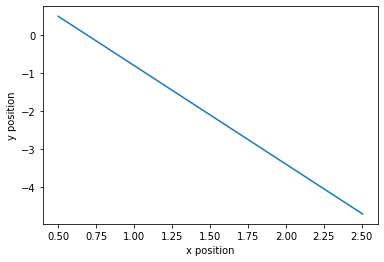

In [4]:
x = 3
y = -6
b = .5

c = 1
rate = 1e-3

x_time = []
y_time = []


iterCount = 0
for i in range (10000):
    delta_b = 0
    delta_x = 0
    delta_y = 0
    for index in range(4):
        delta_b += grad_b(x, y, b, c, sataliteData[index][0], sataliteData[index][1], sataliteData[index][2], sataliteData[index][3])
        delta_x += grad_x(x, y, b, c, sataliteData[index][0], sataliteData[index][1], sataliteData[index][2], sataliteData[index][3])
        delta_y += grad_y(x, y, b, c, sataliteData[index][0], sataliteData[index][1], sataliteData[index][2], sataliteData[index][3])
    delta_b /= 4
    delta_b *= rate
    delta_x /= 4
    delta_x *= rate
    delta_y /= 4
    delta_y *= rate
    if np.abs(delta_x) < 1e-15 and np.abs(delta_y) < 1e-15 and np.abs(delta_b) < 1e-15:
        print("delta x:", delta_x, "delta y:", delta_y, "delta b:", delta_b, "iterate:", i)
        break
    x -= delta_x
    y -= delta_y
    b -= delta_b

    x_time.append(x)
    y_time.append(y)

print(x, y, b)
plt.plot(x_time, y_time)
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

0.5000000013346843 0.4999999965298208 -4.1328239614531825e-16
0.49999998969716763 0.5000000065563481 -3.65642180337189e-15
0.5000000106583483 0.5000000120794614 -6.222243577849255e-15


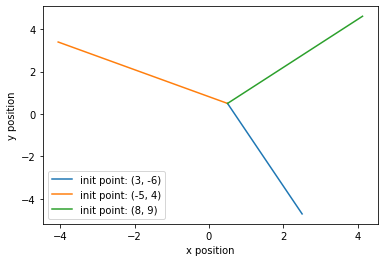

In [10]:
xs = [3, -5, 8]
ys = [-6, 4, 9]
b = .5

c = 1
rate = 1e-3

for xindex in range(3):
    x_time = []
    y_time = []

    x = xs[xindex]
    y = ys[xindex]

    iterCount = 0
    for i in range (10000):
        delta_b = 0
        delta_x = 0
        delta_y = 0
        for index in range(4):
            delta_b += grad_b(x, y, b, c, sataliteData[index][0], sataliteData[index][1], sataliteData[index][2], sataliteData[index][3])
            delta_x += grad_x(x, y, b, c, sataliteData[index][0], sataliteData[index][1], sataliteData[index][2], sataliteData[index][3])
            delta_y += grad_y(x, y, b, c, sataliteData[index][0], sataliteData[index][1], sataliteData[index][2], sataliteData[index][3])
        delta_b /= 4
        delta_b *= rate
        delta_x /= 4
        delta_x *= rate
        delta_y /= 4
        delta_y *= rate
        if np.abs(delta_x) < 1e-15 and np.abs(delta_y) < 1e-15 and np.abs(delta_b) < 1e-15:
            print("delta x:", delta_x, "delta y:", delta_y, "delta b:", delta_b, "iterate:", i)
            break
        x -= delta_x
        y -= delta_y
        b -= delta_b

        x_time.append(x)
        y_time.append(y)

    print(x, y, b)
    label = 'init point: (' + str(xs[xindex]) + ', ' + str(ys[xindex] )+ ')'
    plt.plot(x_time, y_time, label=label)
plt.xlabel('x position')
plt.ylabel('y position')
plt.legend(loc='lower left')
plt.show()
